In this notebook, we introduce primal-dual methods for quadratic programming. Let us consider the following quadratic program
$$
\begin{aligned}
\min_x\; &\frac{1}{2} x^\top Q x + c^\top x \\
\text{s.t.}\; & Ax \leq b,
\end{aligned}
$$
where $A \in \mathbb{R}^{m \times n}$, $Q \in \mathbb{R}^{n \times n}$ is positive semi-definite. We write the KKT conditions as follows:
$$
\begin{aligned}
Qx + c + A^\top \lambda &= 0, \\
Ax - b &\leq 0, \\
(Ax - b)_i \lambda_i &= 0,\; i = 1, 2, \dots, m, \\
\lambda &\geq 0.
\end{aligned}
$$
By introducing the slack vector $s \geq 0$, we can rewrite the conditions as
$$
\begin{equation}
\begin{aligned}
Qx + c + A^\top \lambda &= 0, \\
Ax - b + s&= 0, \\
s_i \lambda_i &= 0,\; i = 1, 2, \dots, m, \\
\lambda \geq 0,\; s &\geq 0. 
\end{aligned}
\end{equation} \tag{1}
$$
Note that the KKT conditions corresponds to the following optimization problem
$$
\begin{aligned}
\min_{x, s}\; &\frac{1}{2} x^\top Q x + c^\top x \\
\text{s.t.}\; & Ax + s = b \\
& s \geq 0.
\end{aligned}
$$

Our goal is to find the solutions of the system (1). For clarity, we define a mapping $F$ from $\mathbb{R}^{2m+n}$ to $\mathbb{R}^{2m+n}$
$$
\begin{equation}
F(x, s, \lambda) = \begin{bmatrix}
    Qx + c + A^\top \lambda \\
    Ax - b + s \\
    S\Lambda e
\end{bmatrix} = 0,
\end{equation} \tag{2}
$$
where $S = \text{diag}(s_1, s_2, \dots , s_m)$, $\Lambda = \text{diag}(\lambda_1, \lambda_2, \dots , \lambda_m)$, $e = [1, 1, \dots, 1]^\top$.
We begin by applying a Newton-like method to $F = 0$ and then find an appropriate step length along the search direction such that $\lambda, s \geq 0$ are satisfied at each iteration.
We derive the linear system to be solved for the search direction $(\Delta x, \Delta \lambda, \Delta s)$ as
$$
\begin{equation}
\begin{bmatrix}
Q & A^\top & 0 \\
A & 0 & I \\
0 & S & \Lambda
\end{bmatrix}
\begin{bmatrix}
\Delta x \\ \Delta \lambda \\ \Delta s
\end{bmatrix} = 
-\begin{bmatrix}
    Qx + c + A^\top \lambda \\
    Ax - b + s \\
    S\Lambda e
\end{bmatrix}.
\end{equation} \tag{3}
$$
Since a full Newton step would violate the bound $x, s \geq 0$, we need to perform a line search along the search direction and then obtain the following new iterate
$$
(x, \lambda, s) + \alpha (\Delta x, \Delta \lambda, \Delta s),
$$
where $\alpha \in (0, 1]$ is the line search parameter. However, moving directly along the pure Newton direction—also known as the affine scaling direction—often results in limited progress toward the solution. To address this, we can perturb the Newton direction to make it less aggressive. So, instead of enforcing $s_i \lambda_i = 0$, we require it to be reduced to a small value $\sigma \mu$, where
$$
\mu = \frac{s^\top \lambda}{m} 
$$
is the current duality measure and $\sigma \in [0, 1]$ is the reduction factor. The perturbed KKT conditions are then
$$
\begin{equation}
\begin{aligned}
Qx + c + A^\top \lambda &= 0, \\
Ax - b + s&= 0, \\
s_i \lambda_i &= \sigma \mu,\; i = 1, 2, \dots, m, \\
\lambda \geq 0,\; s &\geq 0. 
\end{aligned}
\end{equation} 
$$
The corresponding search direction can be computed by solving the following linear equations
$$
\begin{bmatrix}
Q & A^\top & 0 \\
A & 0 & I \\
0 & S & \Lambda
\end{bmatrix}
\begin{bmatrix}
\Delta x \\ \Delta \lambda \\ \Delta s
\end{bmatrix} = 
\begin{bmatrix}
    - Qx - c - A^\top \lambda \\
    - Ax + b - s \\
    - S\Lambda e + \textcolor{blue}{\sigma \mu e}
\end{bmatrix}.
$$
When $\sigma > 0$, it is often possible to take a longer step $\alpha$ along the perturbed direction without violating the bounds $(s, \lambda) > 0$.

### Mehrotra correction
Next, we introduce the Mehrota predictor-corrector algorithm, which has proven effective in practice. The first part of the Mehrotra search direction, the predictor step, is simply a pure Newton step for the system (2). We denote the corresponding solution of (3) by $(\Delta x_{\text{aff}}, \Delta \lambda_{\text{aff}}, \Delta s_{\text{aff}})$. If a full step is taken in this direction, we find 
$$
(s_i + \Delta s_{\text{aff}, i})(\lambda_i + \Delta \lambda_{\text{aff}, i}) = s_i \lambda_i + s_i \Delta \lambda_{\text{aff}, i} + \lambda_i \Delta s_{\text{aff}, i} + \Delta s_{\text{aff}, i} \Delta \lambda_{\text{aff}, i} = \Delta s_{\text{aff}, i} \Delta \lambda_{\text{aff}, i}.
$$
The value of $s_i \lambda_i$ is supposed to be $0$. To correct for this deviation, we can solve the following system: 

$$
\begin{bmatrix}
Q & A^\top & 0 \\
A & 0 & I \\
0 & S & \Lambda
\end{bmatrix}
\begin{bmatrix}
\Delta x_{\text{cor}} \\ \Delta \lambda_\text{cor} \\ \Delta s_\text{cor}
\end{bmatrix} = 
\begin{bmatrix}
    0 \\
    0 \\
    - \Delta S_{\text{aff}} \Delta \Lambda_{\text{aff}} e + \textcolor{blue}{\sigma \mu e}
\end{bmatrix},
$$
where 
$\Delta S_{\text{aff}} = \text{diag}(\Delta s_{\text{aff}, 1}, \Delta s_{\text{aff}, 2}, \dots, \Delta s_{\text{aff}, m})$, $\Delta \Lambda_{\text{aff}} = \text{diag}(\Delta \lambda_{\text{aff}, 1}, \Delta \lambda_{\text{aff}, 2}, \dots, \Delta \lambda_{\text{aff}, m})$, and $\mu = \frac{s^\top \lambda}{m}$ is the current duality gap. 
To determine the centering parameter $\sigma$, we first compute the steplength $\alpha_{\text{aff}}$ that can be taken along the affine-scaling direction
$$
\alpha_{\text{aff}} = \max \left\{ \alpha \in [0, 1] \mid (s, \lambda) + \alpha (\Delta \lambda_{\text{aff}}, \Delta s_{\text{aff}}) \geq 0  \right\}.
$$
The new duality gap is given by
$$
\mu_{\text{aff}} = \frac{(\lambda + \alpha_{\text{aff}} \Delta \lambda_{\text{aff}})^\top (s + \alpha_{\text{aff}} \Delta s_{\text{aff}})}{m}.
$$
Finally, we set the centering parameter to 
$$
\sigma = \left( \frac{\mu_{\text{aff}}}{\mu} \right)^3.
$$
By combining the predictor and centering-corrector direction, we obtain the final search direction as follows:
$$
(\Delta x, \Delta \lambda, \Delta s) = (\Delta x_{\text{aff}}, \Delta \lambda_{\text{aff}}, \Delta s_{\text{aff}}) + (\Delta x_{\text{cor}}, \Delta \lambda_{\text{cor}}, \Delta s_{\text{cor}}).
$$
Next, we calculate the step size along the search direction $(\Delta x, \Delta \lambda, \Delta s)$ as follows:
$$
\alpha = \max \left\{ \alpha \in [0, 1] \mid (s, \lambda) + \alpha (\Delta \lambda, \Delta s) \geq 0  \right\}.
$$
The updated iterates are then
$$
(x^+, \lambda^+, s^+) = (x, \lambda, s) + \alpha (\Delta x, \Delta \lambda, \Delta s).
$$

<!-- for $k = 0, 1, 2, \dots$

end -->

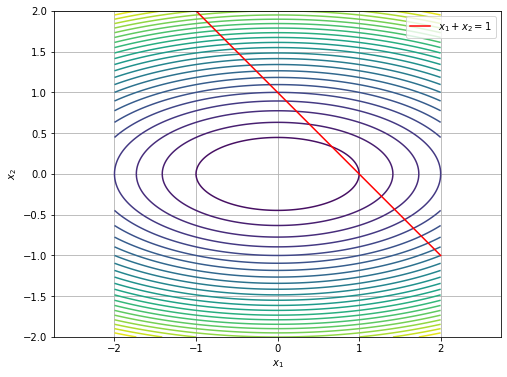

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# J = x.T @ Q @ x 
Q = np.array([
    [1., 0.,],
    [0., 5.,],
])
# Ax <= b
A = np.array([-1., -1.]).reshape(1, 2)
b = np.array([-1]).reshape(1, 1)

# Create a grid of (x1, x2) points
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate the quadratic form J = x^T Q x
J = Q[0,0]*X1**2 + (Q[0,1] + Q[1,0])*X1*X2 + Q[1,1]*X2**2

# Plot contours of J
plt.figure(figsize=(8, 6))
contours = plt.contour(X1, X2, J, levels=25, cmap='viridis')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Plot the constraint Ax <= b (i.e., x1 + x2 >= 1)
x_vals = np.linspace(-1, 2, 400)
y_vals = 1 - x_vals   # from x1 + x2 = 1
plt.plot(x_vals, y_vals, 'r-', label='$x_1 + x_2 = 1$')

plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


In [72]:
x = np.array([1., 1.5]).reshape(2, 1)
n = 2
m = 1
c = np.zeros((n, 1))

s = 0.1
lambda_ = 1
S = np.array([s]).reshape(1, 1)
Lambda = np.array([lambda_]).reshape(1, 1)
s = np.array([s]).reshape(1, 1)
lambda_ = np.array([lambda_]).reshape(1, 1)

J = np.block([
    [Q, A.T, np.zeros((n, m))],
    [A, np.zeros((m, m)), np.eye(m)],
    [np.zeros((m, n)), S, Lambda],
])
r = np.zeros((n + m + m, 1))
r[:n] = Q @ x + c + A.T @ lambda_
r[n:n+m] = A @ x - b + s
r[n+m:n+m+m] = S @ Lambda @ np.ones((m, 1))

print(J)
print(r)

d = np.linalg.solve(J, -r)
x_new = x + d[:n]
print(f"search direction:\n {d}")
print(f"x_new:\n {x_new}")

[[ 1.   0.  -1.   0. ]
 [ 0.   5.  -1.   0. ]
 [-1.  -1.   0.   1. ]
 [ 0.   0.   0.1  1. ]]
[[ 0. ]
 [ 6.5]
 [-1.4]
 [ 0.1]]
search direction:
 [[-0.15384615]
 [-1.33076923]
 [-0.15384615]
 [-0.08461538]]
x_new:
 [[0.84615385]
 [0.16923077]]
